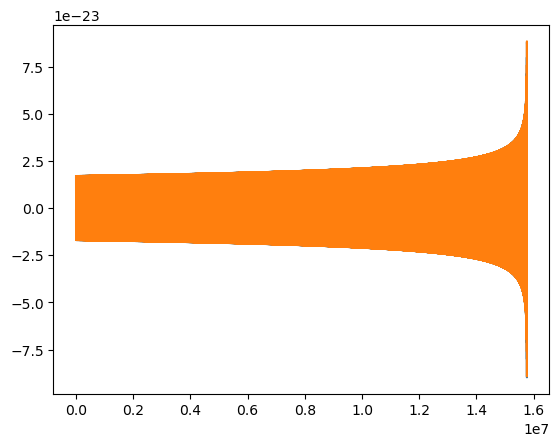

In [1]:
# imports
from modified_few_trajectories import *
from modified_HaloFeedback import *

from matplotlib.ticker import ScalarFormatter, LogLocator, LogFormatter, LogFormatterMathtext
from lisatools.sensitivity import get_sensitivity

In [2]:
# setting some plot parameters

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": "DejaVu Sans",
    "font.weight": "light",
    "axes.grid" : True, 
    "grid.color": "silver",
    "mathtext.fontset": "stix",
    "axes.labelsize": "17", 
    "xtick.labelsize": "12", 
    "ytick.labelsize": "12", 
    "legend.fontsize": "11",
    "axes.titlesize": "18"
})

cmap = plt.cm.twilight

plot_output_dir = 'few_trajectories_output/plots'
os.makedirs(plot_output_dir, exist_ok=True)


In [5]:
# setting some parameters for few

a = 0.0
xi = 1.0
rho_sp_vac = 1e-100
theta = 0.0 # initial phase
phi = 0.0 # initial phase
dist = 3.3 # luminosity distance in Gpc

specific_modes = (2,2,0)

In [ ]:
# Define parameter lists – example cases are provided below.
# Note the difference in the for loops below needed for the preset m/M cases.
# It is recommended to vary only one parameter at a time. 
# This approach improves clarity when analyzing results and avoids unnecessary computational overhead.  
# While the code supports changing multiple parameters simultaneously, note that this can 
# substantially increase runtime.

M_values = [1E5]  # [Msun]
#M_values = [1E5, 1E6, 1E7]  # [Msun] # use for m/M
#epsilon = 1E-5 # use for m/M
#mu_values = [epsilon * M for M in M_values] # [Msun] # use for m/M
mu_values = [10] # [Msun]
T_values = [3.0] # [years]
#T_values = [5.0, 3.0, 1.0]
#p0_values = [15]
p0_values = [35.9]
#p0_values = [16, 12, 8]  # [R_S/2]
e0_values = [0.5] 
gamma_sp_values = [7.0/3.0]
#gamma_sp_values = [1.5, 2.0, 2.5]
dt = 50.0

num_cases = len(M_values) * len(mu_values) * len(p0_values) * len(e0_values) * len(gamma_sp_values) * len(T_values)
print(num_cases)

1


rho_sp [Msun/pc^3] =  22.503745109630994
new traj
3.0
eff_dens_init 0.27577910312750586
f_eps_fin [4.74842560e+04 4.74336586e+04 4.73831151e+04 ... 1.94531228e-05
 1.92201307e-05 1.89899291e-05]
f_eps_init [4.74842560e+04 4.74336586e+04 4.73831151e+04 ... 1.94531228e-05
 1.92201307e-05 1.89899291e-05]
rho_eff_list [1.41826101e+18 1.84093696e+19 1.84093712e+19]
f_eps_fin [4.74842560e+04 4.74336586e+04 4.73831151e+04 ... 1.94531228e-05
 1.92201307e-05 1.89899291e-05]
f_eps_init [4.74842560e+04 4.74336586e+04 4.73831151e+04 ... 1.94531228e-05
 1.92201307e-05 1.89899291e-05]
rho_eff_list [1.41826253e+18 1.84093712e+19 1.84093753e+19]
f_eps_fin [4.74842560e+04 4.74336586e+04 4.73831151e+04 ... 1.94531228e-05
 1.92201307e-05 1.89899291e-05]
f_eps_init [4.74842560e+04 4.74336586e+04 4.73831151e+04 ... 1.94531228e-05
 1.92201307e-05 1.89899291e-05]
rho_eff_list [1.41826654e+18 1.84093753e+19 1.84093862e+19]
f_eps_fin [4.74842560e+04 4.74336586e+04 4.73831151e+04 ... 1.94531228e-05
 1.92201307e

/home/ismini/anaconda3/lib/python3.11/site-packages/lisatools/detector.py:633: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/home/ismini/anaconda3/lib/python3.11/site-packages/lisatools/detector.py:635: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/home/ismini/anaconda3/lib/python3.11/site-packages/lisatools/detector.py:637: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/home/ismini/anaconda3/lib/python3.11/site-packages/lisatools/detector.py:642: RuntimeWarning: divide by zero encountered in divide
  Soms_d = Soms_d_in * (1.0 + (2.0e-3 / f) ** 4)
/home/ismini/anaconda3/lib/python3.11/site-packages/lisatools/detector.py:644: RuntimeWarning: invalid value encountered in multiply
  Soms_nu = Soms_d * (2.0 * np.pi * frq / C_SI) ** 2


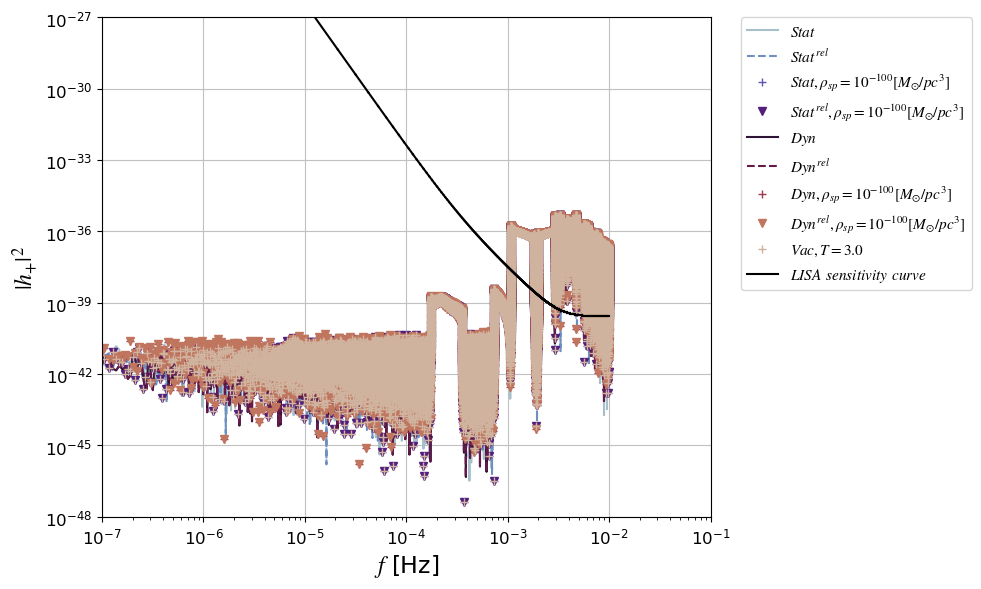

In [ ]:
# We include here a variety of cases, icludic, static and dynamic DM spikes, relativistic or not energy and angular momentum losses,
# and proper and simulated vacuum signals. Comment out any of them you don't need.

# GWs - TD fft
plot_output_dir = 'few_trajectories_output/plots'
os.makedirs(plot_output_dir, exist_ok=True)
mpl.rcParams['agg.path.chunksize'] = 1000
plt.figure(figsize=(10, 6)) 

num_cases = len(M_values) * len(mu_values) * len(p0_values) * len(e0_values) * len(gamma_sp_values) * len(T_values)
N_color = 9 * num_cases # stat, dyn, vac
i_color = np.linspace(0.1, 0.9, N_color)
color_list = [cmap(i) for i in i_color]

i = 0
#if i == 0: # use for m/M
for M in M_values:
    rho_sp = get_rho_sp(M)
    print('rho_sp [Msun/pc^3] = ', rho_sp)
    for mu in mu_values:
    #for M, mu in zip(M_values, mu_values): # use for m/M
      #  rho_sp = get_rho_sp(M) # use for m/M
        for p0 in p0_values:
            for e0 in e0_values:
                for gamma_sp in gamma_sp_values:
                    for T in T_values:
                        print("new traj") # sanity check
                        print(T)
                                                                       
                        # static TD
                        TD_wave_stat_arr = TD_wave_stat(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp, dist=dist, dt=dt, T=T)
                        TD_wave_stat_time = np.arange(0, len(TD_wave_stat_arr))*dt
                        
                        # fft stat
                        fft_TD_wave_stat = np.fft.fftshift(np.fft.fft(TD_wave_stat_arr.real)) * dt
                        freq_TD_wave_stat = np.fft.fftshift(np.fft.fftfreq(len(TD_wave_stat_arr.real), dt))
                        pos_freq_mask_TD_wave_stat = (freq_TD_wave_stat >= 0.0)
                        plt.loglog(freq_TD_wave_stat[pos_freq_mask_TD_wave_stat], np.abs(fft_TD_wave_stat[pos_freq_mask_TD_wave_stat])**2, color=color_list[i], label=fr'$Stat$')
                        i += 1

                        # static rel TD
                        TD_wave_stat_rel_arr = TD_wave_stat_rel(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp, dist=dist, dt=dt, T=T)
                        TD_wave_stat_rel_time = np.arange(0, len(TD_wave_stat_rel_arr))*dt
                        
                        # fft stat rel
                        fft_TD_wave_stat_rel = np.fft.fftshift(np.fft.fft(TD_wave_stat_rel_arr.real)) * dt
                        freq_TD_wave_stat_rel = np.fft.fftshift(np.fft.fftfreq(len(TD_wave_stat_rel_time.real), dt))
                        pos_freq_mask_TD_wave_stat_rel = (freq_TD_wave_stat_rel >= 0.0)
                        plt.loglog(freq_TD_wave_stat_rel[pos_freq_mask_TD_wave_stat_rel], np.abs(fft_TD_wave_stat_rel[pos_freq_mask_TD_wave_stat_rel])**2, '--', color=color_list[i], label=fr'$Stat^{{rel}}$')
                        i += 1

                        # static TD - vacuum 
                        TD_wave_stat_arr_vac = TD_wave_stat(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp_vac, dist=dist, dt=dt, T=T)
                        TD_wave_stat_time_vac = np.arange(0, len(TD_wave_stat_arr_vac))*dt
                        
                        # fft stat - vacuum 
                        fft_TD_wave_stat_vac = np.fft.fftshift(np.fft.fft(TD_wave_stat_arr_vac.real)) * dt
                        freq_TD_wave_stat_vac = np.fft.fftshift(np.fft.fftfreq(len(TD_wave_stat_arr_vac.real), dt))
                        pos_freq_mask_TD_wave_stat_vac = (freq_TD_wave_stat_vac >= 0.0)
                        plt.loglog(freq_TD_wave_stat_vac[pos_freq_mask_TD_wave_stat_vac], np.abs(fft_TD_wave_stat_vac[pos_freq_mask_TD_wave_stat_vac])**2, '+', color=color_list[i], label=fr'$Stat, \rho_{{sp}} = {sci_notation(rho_sp_vac)} [M_{{\odot}}/pc^3]$')
                        i += 1

                        # static rel TD - vacuum 
                        TD_wave_stat_rel_arr_vac = TD_wave_stat_rel(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp_vac, dist=dist, dt=dt, T=T)
                        TD_wave_stat_rel_time_vac = np.arange(0, len(TD_wave_stat_rel_arr_vac))*dt
                        
                        # fft stat rel - vacuum 
                        fft_TD_wave_stat_rel_vac = np.fft.fftshift(np.fft.fft(TD_wave_stat_rel_arr_vac.real)) * dt
                        freq_TD_wave_stat_rel_vac = np.fft.fftshift(np.fft.fftfreq(len(TD_wave_stat_rel_time_vac.real), dt))
                        pos_freq_mask_TD_wave_stat_rel_vac = (freq_TD_wave_stat_rel_vac >= 0.0)
                        plt.loglog(freq_TD_wave_stat_rel_vac[pos_freq_mask_TD_wave_stat_rel_vac], np.abs(fft_TD_wave_stat_rel_vac[pos_freq_mask_TD_wave_stat_rel_vac])**2, 'v', color=color_list[i], label=fr'$Stat^{{rel}}, \rho_{{sp}} = {sci_notation(rho_sp_vac)} [M_{{\odot}}/pc^3]$')
                        i += 1

                        # dynamic TD
                        # Initialize HaloFeedback
                        DMS_init = PowerLawSpike_init(M, mu, gamma_sp, rho_sp)
                        f_eps_init = DMS_init.f_eps
                        DMS = PowerLawSpike(f_eps_init, M, mu, gamma_sp, rho_sp)
                        eff_dens_init = DMS.rho(p0)

                        # Initialize HaloFeedback
                        DMS_vac_init = PowerLawSpike_init(M, mu, gamma_sp, rho_sp_vac)
                        f_eps_init_vac = DMS_vac_init.f_eps
                        DMS_vac = PowerLawSpike(f_eps_init_vac, M, mu, gamma_sp, rho_sp_vac)
                        eff_dens_init_vac = DMS_vac.rho(p0)                            

                        # dyn
                        TD_wave_dyn_arr = TD_wave_dyn(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp, f_eps_init, eff_dens_init, dist=dist, dt=dt, T=T)
                        TD_wave_dyn_time = np.arange(0, len(TD_wave_dyn_arr))*dt

                        # fft dyn
                        fft_TD_wave_dyn = np.fft.fftshift(np.fft.fft(TD_wave_dyn_arr.real)) * dt
                        freq_TD_wave_dyn = np.fft.fftshift(np.fft.fftfreq(len(TD_wave_dyn_arr.real), dt))
                        pos_freq_mask_TD_wave_dyn = (freq_TD_wave_dyn >= 0.0)
                        plt.loglog(freq_TD_wave_dyn[pos_freq_mask_TD_wave_dyn], np.abs(fft_TD_wave_dyn[pos_freq_mask_TD_wave_dyn])**2, color=color_list[i], label=fr'$Dyn$')
                        i += 1
                        
                        # dyn rel
                        TD_wave_dyn_rel_arr = TD_wave_dyn_rel(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp, f_eps_init, eff_dens_init, dist=dist, dt=dt, T=T)
                        TD_wave_dyn_rel_time = np.arange(0, len(TD_wave_dyn_rel_arr))*dt
                        
                        # fft dyn rel
                        fft_TD_wave_dyn_rel = np.fft.fftshift(np.fft.fft(TD_wave_dyn_rel_arr.real)) * dt
                        freq_TD_wave_dyn_rel = np.fft.fftshift(np.fft.fftfreq(len(TD_wave_dyn_rel_arr.real), dt))
                        pos_freq_mask_TD_wave_dyn_rel = (freq_TD_wave_dyn_rel >= 0.0)
                        plt.loglog(freq_TD_wave_dyn_rel[pos_freq_mask_TD_wave_dyn_rel], np.abs(fft_TD_wave_dyn_rel[pos_freq_mask_TD_wave_dyn_rel])**2, "--", color=color_list[i], label=fr'$Dyn^{{rel}}$')
                        i += 1

                        # dyn - vac
                        TD_wave_dyn_arr_vac = TD_wave_dyn(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp_vac, f_eps_init_vac, eff_dens_init_vac, dist=dist, dt=dt, T=T)
                        TD_wave_dyn_time_vac = np.arange(0, len(TD_wave_dyn_arr_vac))*dt

                        # fft dyn - vac
                        fft_TD_wave_dyn_vac = np.fft.fftshift(np.fft.fft(TD_wave_dyn_arr_vac.real)) * dt
                        freq_TD_wave_dyn_vac = np.fft.fftshift(np.fft.fftfreq(len(TD_wave_dyn_arr_vac.real), dt))
                        pos_freq_mask_TD_wave_dyn_vac = (freq_TD_wave_dyn_vac >= 0.0)
                        plt.loglog(freq_TD_wave_dyn_vac[pos_freq_mask_TD_wave_dyn_vac], np.abs(fft_TD_wave_dyn_vac[pos_freq_mask_TD_wave_dyn_vac])**2, "+", color=color_list[i], label=fr'$Dyn, \rho_{{sp}} = {sci_notation(rho_sp_vac)} [M_{{\odot}}/pc^3]$')
                        i += 1
                        
                        # dyn rel - vac
                        TD_wave_dyn_rel_arr_vac = TD_wave_dyn_rel(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp_vac, f_eps_init_vac, eff_dens_init_vac, dist=dist, dt=dt, T=T)
                        TD_wave_dyn_rel_time_vac = np.arange(0, len(TD_wave_dyn_rel_arr_vac))*dt
                        
                        # fft dyn rel - vac
                        fft_TD_wave_dyn_rel_vac = np.fft.fftshift(np.fft.fft(TD_wave_dyn_rel_arr_vac.real)) * dt
                        freq_TD_wave_dyn_rel_vac = np.fft.fftshift(np.fft.fftfreq(len(TD_wave_dyn_rel_arr_vac.real), dt))
                        pos_freq_mask_TD_wave_dyn_rel_vac = (freq_TD_wave_dyn_rel_vac >= 0.0)
                        plt.loglog(freq_TD_wave_dyn_rel_vac[pos_freq_mask_TD_wave_dyn_rel_vac], np.abs(fft_TD_wave_dyn_rel_vac[pos_freq_mask_TD_wave_dyn_rel_vac])**2, "v", color=color_list[i], label=fr'$Dyn^{{rel}}, \rho_{{sp}} = {sci_notation(rho_sp_vac)} [M_{{\odot}}/pc^3]$')
                        i += 1

                        # vacuum TD
                        TD_vac_wave_arr = TD_wave_vacuum(M, mu, p0, e0, theta, phi, dist=dist, dt=dt, T=T)
                        TD_vac_wave_arr_time = np.arange(0, len(TD_vac_wave_arr))*dt
                        
                        # fft vac
                        fft_TD_wave_vac = np.fft.fftshift(np.fft.fft(TD_vac_wave_arr.real)) * dt
                        freq_TD_wave_vac = np.fft.fftshift(np.fft.fftfreq(len(TD_vac_wave_arr.real), dt))
                        pos_freq_mask_TD_wave_vac = (freq_TD_wave_vac >= 0.0)
                        plt.loglog(freq_TD_wave_vac[pos_freq_mask_TD_wave_vac], np.abs(fft_TD_wave_vac[pos_freq_mask_TD_wave_vac])**2, '+', color=color_list[i], label=fr'$Vac, T = {T}$')
                        i += 1

                        # mislaps
                        over_stat = get_overlap(TD_wave_stat_arr, TD_vac_wave_arr)
                        over_stat_rel = get_overlap(TD_wave_stat_rel_arr, TD_vac_wave_arr)
                        print('over_stat =', over_stat)
                        print('over_stat_rel', over_stat_rel)

                        over_dyn = get_overlap(TD_wave_dyn_arr, TD_vac_wave_arr)
                        over_dyn_rel = get_overlap(TD_wave_dyn_rel_arr, TD_vac_wave_arr)
                        print('over_dyn', over_dyn)
                        print('over_dyn_rel', over_dyn_rel)

                        over_stat_dyn = get_overlap(TD_wave_stat_arr, TD_wave_dyn_arr)
                        over_stat_dyn_rel = get_overlap(TD_wave_stat_rel_arr, TD_wave_dyn_rel_arr)
                        print('over_stat_dyn', over_stat_dyn)
                        print('over_stat_dyn_rel', over_stat_dyn_rel)

                        # mismatches
                        mis_stat = get_mismatch(TD_wave_stat_arr, TD_vac_wave_arr)
                        mis_stat_rel = get_mismatch(TD_wave_stat_rel_arr, TD_vac_wave_arr)
                        print('mis_stat =', mis_stat)
                        print('mis_stat_rel', mis_stat_rel)

                        mis_dyn = get_mismatch(TD_wave_dyn_arr, TD_vac_wave_arr)
                        mis_dyn_rel = get_mismatch(TD_wave_dyn_rel_arr, TD_vac_wave_arr)
                        print('mis_dyn', mis_dyn)
                        print('mis_dyn_rel', mis_dyn_rel)

                        mis_stat_dyn = get_mismatch(TD_wave_stat_arr, TD_wave_dyn_arr)
                        mis_stat_dyn_rel = get_mismatch(TD_wave_stat_rel_arr, TD_wave_dyn_rel_arr)
                        print('mis_stat_dyn_rel', mis_stat_dyn)
                        print('mis_stat_dyn_rel', mis_stat_dyn_rel)

# plot strain^2 - freq -- with LISA sensitivity
plt.loglog(freq_TD_wave_stat_rel[pos_freq_mask_TD_wave_dyn_rel], get_sensitivity(freq_TD_wave_stat_rel[pos_freq_mask_TD_wave_dyn_rel]), color='k', label=fr'$LISA$ $sensitivity$ $curve$')
plt.ylabel(r'$|h_{+}|^2$')
plt.xlabel(r'$f$ [Hz]')
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.xlim(1e-7, 1e-1)
plt.ylim(1e-48, 1e-27)
plt.tight_layout()
figname = f'T_cases_gw_td_fft_p0_{p0}_e0_{e0}_M_{M}_mu_{mu}_gamma_sp_{gamma_sp}_{T}.png'
plt.savefig(os.path.join(plot_output_dir, figname), bbox_inches="tight")
plt.show()



In [ ]:
# some additional overlap comparisons 
# vacuum comp
# overlaps
over_stat_vac = get_overlap(TD_wave_stat_arr_vac, TD_vac_wave_arr)
over_stat_rel_vac = get_overlap(TD_wave_stat_rel_arr_vac, TD_vac_wave_arr)
over_dyn_vac = get_overlap(TD_wave_dyn_arr_vac, TD_vac_wave_arr)
over_dyn_rel_vac = get_overlap(TD_wave_dyn_rel_arr_vac, TD_vac_wave_arr)
over_stat_dyn_vac = get_overlap(TD_wave_stat_arr_vac, TD_wave_dyn_arr_vac)
over_stat_dyn_rel_vac = get_overlap(TD_wave_stat_rel_arr_vac, TD_wave_dyn_rel_arr_vac)

print('over_stat_vac =', over_stat_vac)
print('over_stat_rel_vac =', over_stat_rel_vac)
print('over_dyn_vac =', over_dyn_vac)
print('over_dyn_rel_vac =', over_dyn_rel_vac)
print('over_stat_dyn_vac =', over_stat_dyn_vac)
print('over_stat_dyn_rel_vac =', over_stat_dyn_rel_vac)

# mismatches
mis_stat_vac = get_mismatch(TD_wave_stat_arr_vac, TD_vac_wave_arr)
mis_stat_rel_vac = get_mismatch(TD_wave_stat_rel_arr_vac, TD_vac_wave_arr)
mis_dyn_vac = get_mismatch(TD_wave_dyn_arr_vac, TD_vac_wave_arr)
mis_dyn_rel_vac = get_mismatch(TD_wave_dyn_rel_arr_vac, TD_vac_wave_arr)
mis_stat_dyn_vac = get_mismatch(TD_wave_stat_arr_vac, TD_wave_dyn_arr_vac)
mis_stat_dyn_rel_vac = get_mismatch(TD_wave_stat_rel_arr_vac, TD_wave_dyn_rel_arr_vac)

print('mis_stat_vac =', mis_stat_vac)
print('mis_stat_rel_vac =', mis_stat_rel_vac)
print('mis_dyn_vac =', mis_dyn_vac)
print('mis_dyn_rel_vac =', mis_dyn_rel_vac)
print('mis_stat_dyn_vac =', mis_stat_dyn_vac)
print('mis_stat_dyn_rel_vac =', mis_stat_dyn_rel_vac)

over_stat_vac = 1.0
over_stat_rel_vac = 1.0
over_dyn_vac = 0.06602490304928807
over_dyn_rel_vac = 0.06602490304928807
over_stat_dyn_vac = 0.06602490304928807
over_stat_dyn_rel_vac = 0.06602490304928807
mis_stat_vac = 0.0
mis_stat_rel_vac = 0.0
mis_dyn_vac = 0.9339750969507119
mis_dyn_rel_vac = 0.9339750969507119
mis_stat_dyn_vac = 0.9339750969507119
mis_stat_dyn_rel_vac = 0.9339750969507119


In [ ]:
# example waves in TD 
# GWs - TD
plot_output_dir = 'few_trajectories_output/plots'
os.makedirs(plot_output_dir, exist_ok=True)
mpl.rcParams['agg.path.chunksize'] = 1000
plt.figure(figsize=(10, 6)) 

num_cases = len(M_values) * len(mu_values) * len(p0_values) * len(e0_values) * len(gamma_sp_values) * len(T_values)
N_color = 3 * num_cases # stat, dyn + vac
i_color = np.linspace(0.1, 0.9, N_color)
color_list = [cmap(i) for i in i_color]
i=0

for M in M_values:
    rho_sp = get_rho_sp(M)  # [Msun/pc^3]
    print('rho_sp [Msun/pc^3] = ',rho_sp)
    for mu in mu_values:
        print('mass ratio =', mu/M)
        for p0 in p0_values:
            for e0 in e0_values:
                for gamma_sp in gamma_sp_values:
                    for T in T_values:
                                                                       
                        # static TD
                        #TD_wave_stat_arr = TD_wave_stat(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp, dist=dist, dt=dt, T=T)
                        #TD_wave_stat_time = np.arange(0, len(TD_wave_stat_arr))*dt
                        #plt.loglog(TD_wave_stat_time, TD_wave_stat_arr.real, color=color_list[i], label=fr'$Stat, M={sci_notation(M)} [M_{{\odot}}]$')
                        #i += 1
                        
                        # static rel TD
                        TD_wave_stat_rel_arr = TD_wave_stat_rel(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp, dist=dist, dt=dt, T=T)
                        TD_wave_stat_rel_time = np.arange(0, len(TD_wave_stat_rel_arr))*dt
                        plt.plot(TD_wave_stat_rel_time, TD_wave_stat_rel_arr.real, color=color_list[i], label=fr'$Stat^{{rel}}, m={sci_notation(mu)} [M_{{\odot}}]$')
                        i += 1

                        # dynamic TD
                        # Initialize HaloFeedback
                        DMS = PowerLawSpike(M, mu, gamma_sp, rho_sp)
                        f_eps_init = DMS.f_eps
                        eff_dens_init = DMS.rho(p0)                            

                        #TD_wave_dyn_arr = TD_wave_dyn(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp, f_eps_init, eff_dens_init, dist=dist, dt=dt, T=T)
                        #TD_wave_dyn_time = np.arange(0, len(TD_wave_dyn_arr))*dt
                        #plt.plot(TD_wave_dyn_time, TD_wave_dyn_arr.real, color=color_list[i], label=fr'$Dyn, M={sci_notation(M)} [M_{{\odot}}]$')
                        #i += 1

                        # dynamic rel TD
                        TD_wave_dyn_rel_arr = TD_wave_dyn_rel(M, mu, p0, e0, theta, phi, gamma_sp, rho_sp, f_eps_init, eff_dens_init, dist=dist, dt=dt, T=T)
                        TD_wave_dyn_rel_time = np.arange(0, len(TD_wave_dyn_rel_arr))*dt
                        plt.loglog(TD_wave_dyn_rel_time, TD_wave_dyn_rel_arr.real, color=color_list[i], label=fr'$Dyn^{{rel}}, m={sci_notation(mu)} [M_{{\odot}}]$')
                        i += 1
                        
                        # vacuum TD
                        TD_vac_wave_arr = TD_wave_vacuum(M, mu, p0, e0, theta, phi, dist=dist, dt=dt, T=T)
                        TD_vac_wave_arr_time = np.arange(0, len(TD_vac_wave_arr))*dt
                        plt.loglog(TD_vac_wave_arr_time, TD_vac_wave_arr.real, color=color_list[i], label=fr'$Vac, m={sci_notation(mu)} [M_{{\odot}}]$')
                        i += 1

                        # overlaps
                        over_stat = get_overlap(TD_wave_stat_rel_arr, TD_vac_wave_arr)
                        #over_stat_rel = get_overlap(TD_wave_stat_rel_arr, TD_wave_stat_rel_vac_arr)
                        print('over_stat =', over_stat)
                        #print(over_stat_rel)

                        #over_dyn = get_overlap(TD_wave_dyn_arr, TD_vac_wave_arr)
                        over_dyn_rel = get_overlap(TD_wave_dyn_rel_arr, TD_vac_wave_arr)
                        #print('over_dyn', over_dyn)
                        print('over_dyn_rel', over_dyn_rel)

                        over_stat_dyn_rel = get_overlap(TD_wave_stat_rel_arr, TD_wave_dyn_rel_arr)
                        print('over_stat_dyn_rel', over_stat_dyn_rel)

                        # mismatches
                        mis_stat = get_mismatch(TD_wave_stat_rel_arr, TD_vac_wave_arr)
                        #mis_stat_rel = get_mismatch(TD_wave_stat_rel_arr, TD_wave_stat_rel_vac_arr)
                        print('mis_stat =', mis_stat)
                        #print(mis_stat_rel)

                        #mis_dyn = get_mismatch(TD_wave_dyn_arr, TD_vac_wave_arr)
                        mis_dyn_rel = get_mismatch(TD_wave_dyn_rel_arr, TD_vac_wave_arr)
                        #print('mis_dyn', mis_dyn)
                        print('mis_dyn_rel', mis_dyn_rel)

                        mis_stat_dyn_rel = get_mismatch(TD_wave_stat_rel_arr, TD_wave_dyn_rel_arr)
                        print('mis_stat_dyn_rel', mis_stat_dyn_rel)

# plot strain - time
plt.xlabel(r'$t [s]$')
plt.ylabel(r'$|h_{+}|$')
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_formatter(LogFormatterMathtext(labelOnlyBase=True))
figname = f'm_cases_gw_td__gamma_sp_{gamma_sp:.2f}_p0_{p0}_e0_{e0}_T_{T}.png'
plt.savefig(os.path.join(plot_output_dir, figname), bbox_inches="tight")
plt.show()     

